In [45]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print("TensorFlow version installed: ", tf.__version__)

TensorFlow version installed:  2.12.0


In [46]:
fashion = tf.keras.datasets.fashion_mnist
(train_img, train_labels), (test_img, test_labels) = fashion.load_data()

In [47]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [48]:
print("Train image shape: ", train_img.shape)
print("Test image shape: ", test_img.shape)
print("Train labels length: ", len(train_labels)) # each label is an int between 0 and 9
print("Test labels length: ", len(test_labels))

Train image shape:  (60000, 28, 28)
Test image shape:  (10000, 28, 28)
Train labels length:  60000
Test labels length:  10000


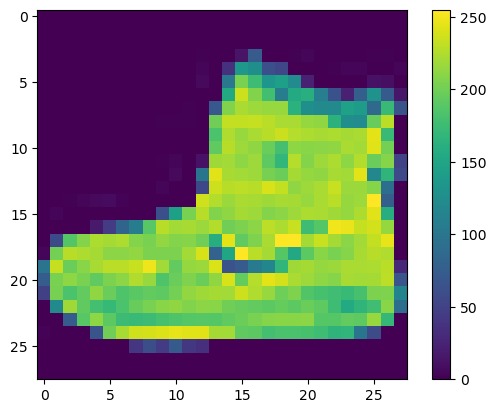

In [49]:
# Preprocessing training data

img = 0 # image index in training array

plt.figure()
plt.imshow(train_img[img])
plt.colorbar()
plt.grid(False)
plt.show()

In [50]:
train_img = train_img / 255.0
test_img = test_img / 255.0

^ We need to scale the values of each pixel before feeding the data to the model.

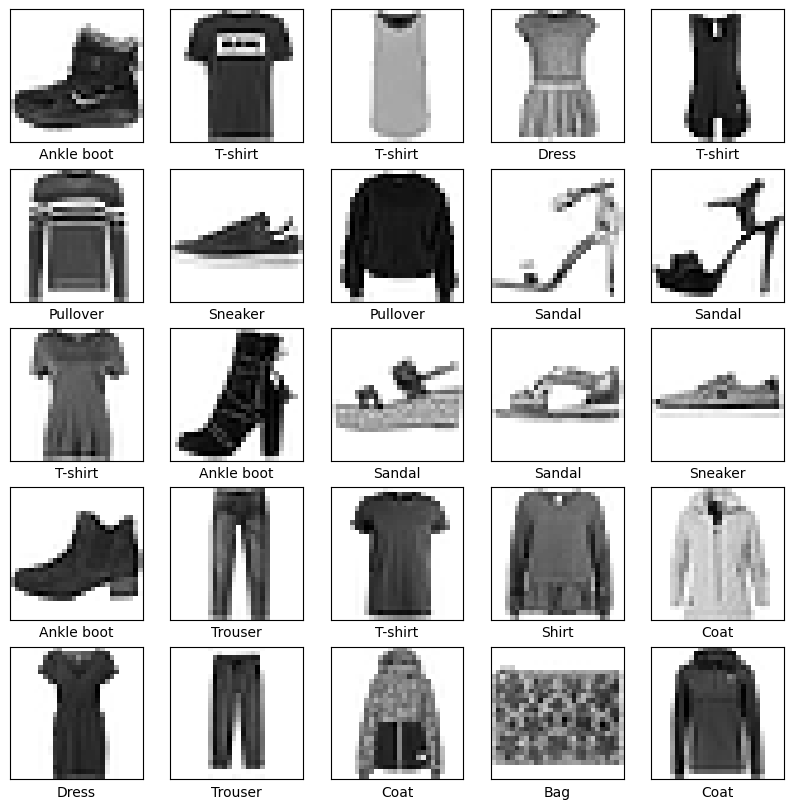

In [51]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_img[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

^ Here we display the first 25 training images and their corresponding labels in order to test if the initial data is correct

In [52]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # Reformat the data into a 28*28 = 784 array
    tf.keras.layers.Dense(128, activation='relu'), # Dense neuron layer with 128 nodes
    tf.keras.layers.Dense(10) #returns an array of "logits" (raw, non-normalized predictions that a model generates) of length 10. Each node contains a score that indicares the class that the current image belongs to
])

In [53]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

When we compile a model, it needs a few more settings:
- <b>Optimizer</b> - this is how the model is updated based on the data it sees
- <b>Loss function</b> - this measures how accurate the model is during training. This function is better minimized in order to "steer" the model in the right direction.
- <b>Metrics</b> - used to monitor the training and testing steps. We used accuracy, aka the fraction of images that are correctly classified

Steps taked when training the model:
1. Feed it the training data.
2. The model learns to associate images and labels
3. The model makes predictions avout a test set
4. We verify if the predictions match the test labels

In [54]:
model.fit(train_img, train_labels, epochs=10) # train the model with the given data ("fit" the model for to the training data)

Epoch 1/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.4967 - accuracy: 0.8256
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3765 - accuracy: 0.8634
Epoch 3/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.3324 - accuracy: 0.8780
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3112 - accuracy: 0.8857
Epoch 5/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2936 - accuracy: 0.8911
Epoch 6/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2778 - accuracy: 0.8969
Epoch 7/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2649 - accuracy: 0.9010
Epoch 8/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2542 - accuracy: 0.9056
Epoch 9/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.2447 - accuracy: 0.9085
Epoch 10/10
1875/1875 [==============================] - 29s 16m

In [56]:
test_loss, test_acc = model.evaluate(test_img, test_labels, verbose=2) # evaluate the accuracy of the model using the test data set
print("\nTest accuracy: ", test_acc) # ~88% accuracy

313/313 - 1s - loss: 0.3399 - accuracy: 0.8807 - 1s/epoch - 4ms/step

Test accuracy:  0.8806999921798706


When training the model, the accuracy was about <i>91%</i>. However, when using the model with the test data instead of the training data, the accuracy is aprox. <i>88%</i>. <br> This happens beacause of something called <b>overfitting</b> - it happens when a model performs worse on new, previously unseen datasets. An overfitted model "memorizes" all the details in the training dataset and ends up making mistakes when given new data. <br>
(<small style="color: grey">Spus mai simplu, e ca un copil care a tocit ceva mult prea mult si defapt nu stie sa aplice ce a invatat</small>)

In [59]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_img)

313/313 [==============================] - 2s 7ms/step


In [63]:
predictions[0] # its an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 classes of clothing
# The index of the biggest of these numbers is the class to which the clothing most probably belongs

array([1.1920527e-08, 2.2702239e-11, 1.3152212e-11, 1.0431917e-11,
       7.9936280e-11, 9.4290194e-04, 1.5364000e-08, 5.0293528e-03,
       3.9763336e-08, 9.9402761e-01], dtype=float32)

In [68]:
def plot_img(i, predictions_arr, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_arr)
    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red"
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_arr), class_names[true_label]), color=color)



def plot_vals(i, predictions_arr, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_arr, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_arr)

    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("blue")


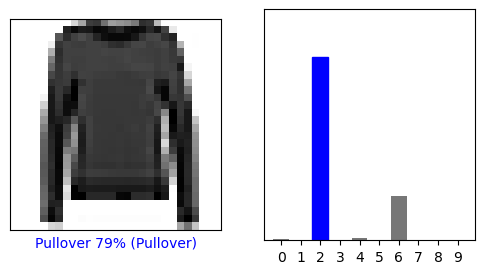

In [87]:
image = 99 # index of image to classify using the model

plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_img(image, predictions[image], test_labels, test_img)
plt.subplot(1, 2, 2)
plot_vals(image, predictions[image], test_labels)
plt.show()